<a href="https://colab.research.google.com/github/weiling0325/Schizophrenia-Detection-Using-Microbiome-Data/blob/main/Approach_3_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Approach 3: Baseline**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# import warning library to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option("display.max_rows", None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Dataset/training_data.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Dataset/testing_data.csv')

In [ ]:
X_train = train_df.drop(columns=['diagnosis'])
y_train = train_df['diagnosis']

X_test = test_df.drop(columns=['diagnosis'])
y_test = test_df['diagnosis']

In [ ]:
# Initialize the RandomForestclassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.7755102040816326


In [ ]:
# Evaluate the model using cross-validation with different scoring metrics
accuracy_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

# Display the results for each metric
print(f"Accuracy scores (5-fold CV): {accuracy_scores}")
print(f"Mean accuracy: {accuracy_scores.mean():.4f}")


Accuracy scores (5-fold CV): [0.82608696 0.7826087  1.         0.77272727 0.77272727]
Mean accuracy: 0.8308


Hyperparameter tuning for the RandomForestClassifier using RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Perform the hyperparameters tuning for RandomForestclassifier using RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at a leaf node
    'bootstrap': [True, False]        # Whether bootstrap samples are used
}
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,cv=5, n_iter=10, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print(f'Best hyperparameters: {best_params}')

# Train the model with the best hyperparameters
best_rf = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with tuned hyperparameters: {accuracy}')

# Evaluate the model using cross-validation with different scoring metrics
accuracy_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy')

# Display the results for each metric
print(f"Accuracy scores (5-fold CV): {accuracy_scores}")
print(f"Mean accuracy: {accuracy_scores.mean():.4f}")


Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}
Accuracy with tuned hyperparameters: 0.7959183673469388
Accuracy scores (5-fold CV): [0.82608696 0.7826087  0.90909091 0.81818182 0.77272727]
Mean accuracy: 0.8217


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn import metrics
import matplotlib.pyplot as plt

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        24
           1       0.89      0.68      0.77        25

    accuracy                           0.80        49
   macro avg       0.81      0.80      0.79        49
weighted avg       0.82      0.80      0.79        49


Confusion Matrix:
[[22  2]
 [ 8 17]]



AUC-ROC Score: 0.8133


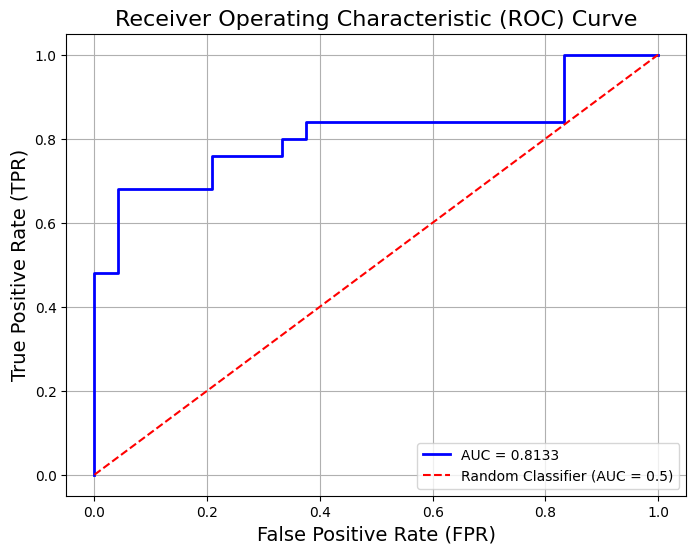

In [ ]:
# Calculate Probabilities for the positive class
y_pred_prob = best_rf.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"\nAUC-ROC Score: {auc_score:.4f}")

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', linewidth=2, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
###Logistic Regression
from sklearn.linear_model import LogisticRegression

# Initialize the LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model performance
clf_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression: {clf_accuracy}')

# Evaluate the model using 5-fold cross-validation with different scoring metrics
clf_accuracy_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

# Display the results for each metric
print(f"Accuracy scores (5-fold CV): {clf_accuracy_scores}")
print(f"Mean accuracy: {clf_accuracy_scores.mean():.4f}")


Accuracy of Logistic Regression: 0.7551020408163265
Accuracy scores (5-fold CV): [0.7826087  0.82608696 0.90909091 0.72727273 0.72727273]
Mean accuracy: 0.7945


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Perform the hyperparameters tuning for LogisticRegression using RandomizedSearchCV
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization penalty
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['lbfgs', 'liblinear', 'saga'],  # Algorithm to use in the optimization problem
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}
clf_random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist,cv=5, n_iter=10, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the model on the training data
clf_random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = clf_random_search.best_params_
print(f'Best hyperparameters: {best_params}')

# Train the model with the best hyperparameters
best_clf = clf_random_search.best_estimator_

# Make predictions on the test set
y_pred = best_clf.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with tuned hyperparameters: {accuracy}')

# Evaluate the model using cross-validation with different scoring metrics
accuracy_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

# Display the results for each metric
print(f"Accuracy scores (5-fold CV): {accuracy_scores}")
print(f"Mean accuracy: {accuracy_scores.mean():.4f}")


Best hyperparameters: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 100, 'C': 10}
Accuracy with tuned hyperparameters: 0.7551020408163265
Accuracy scores (5-fold CV): [0.7826087  0.82608696 0.90909091 0.72727273 0.72727273]
Mean accuracy: 0.7945


In [ ]:
# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        24
           1       0.78      0.72      0.75        25

    accuracy                           0.76        49
   macro avg       0.76      0.76      0.76        49
weighted avg       0.76      0.76      0.75        49


Confusion Matrix:
[[19  5]
 [ 7 18]]



AUC-ROC Score: 0.8467


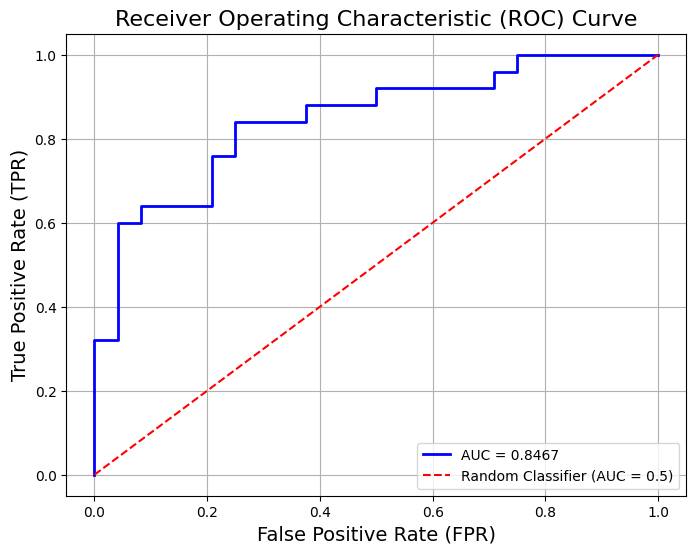

In [ ]:
# Calculate Probabilities for the positive class
y_pred_prob = best_clf.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"\nAUC-ROC Score: {auc_score:.4f}")

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', linewidth=2, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right')
plt.grid()
plt.show()



**SMOTE Technique With RandomForestclassifier**

In [ ]:
# Define the pipeline with SMOTE and Random Forest
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the Model on the test set
y_pred = pipeline.predict(X_test)
accuracy_on_test = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy_on_test:.4f}')

# Perform 5-Fold Cross-Validation with SMOTE before hyperparameter tuning
cv_accuracy_before = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f"5-Fold CV Accuracy (before tuning): {cv_accuracy_before}")
print(f"Mean CV Accuracy (before tuning): {cv_accuracy_before.mean():.4f}")


Accuracy on the test set: 0.7755
5-Fold CV Accuracy (before tuning): [0.7826087  0.73913043 1.         0.77272727 0.72727273]
Mean CV Accuracy (before tuning): 0.8043


In [ ]:
# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        24
           1       0.89      0.64      0.74        25

    accuracy                           0.78        49
   macro avg       0.80      0.78      0.77        49
weighted avg       0.80      0.78      0.77        49


Confusion Matrix:
[[22  2]
 [ 9 16]]



AUC-ROC Score: 0.8083


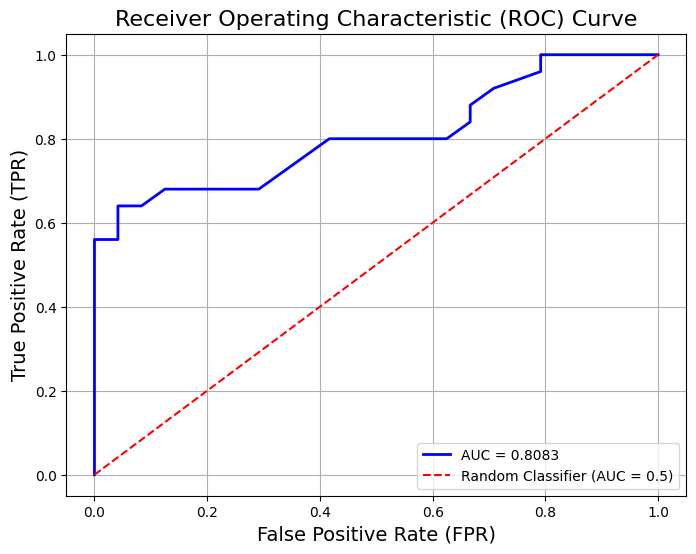

In [ ]:
# Calculate Probabilities for the positive class
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"\nAUC-ROC Score: {auc_score:.4f}")

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', linewidth=2, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [10, 20, 30, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__bootstrap': [True, False]
}
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_dist, cv=5, n_iter=10, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print(f'Best hyperparameters: {best_params}')

# Get the tuned model
best_pipeline = random_search.best_estimator_

# Evaluate the tuned model on the test set
y_pred = best_pipeline.predict(X_test)
accuracy_after_tuning = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set (after tuning): {accuracy_after_tuning:.4f}')

# Perform 5-Fold Cross-Validation using the best pipeline
cv_accuracy_after = cross_val_score(best_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f"5-Fold CV Accuracy (after tuning): {cv_accuracy_after}")
print(f"Mean CV Accuracy (after tuning): {cv_accuracy_after.mean():.4f}")


Best hyperparameters: {'rf__n_estimators': 300, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 4, 'rf__max_depth': 30, 'rf__bootstrap': False}
Accuracy on the test set (after tuning): 0.7755
5-Fold CV Accuracy (after tuning): [0.7826087  0.73913043 0.95454545 0.77272727 0.77272727]
Mean CV Accuracy (after tuning): 0.8043


In [ ]:
# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        24
           1       0.89      0.64      0.74        25

    accuracy                           0.78        49
   macro avg       0.80      0.78      0.77        49
weighted avg       0.80      0.78      0.77        49


Confusion Matrix:
[[22  2]
 [ 9 16]]



AUC-ROC Score: 0.8050


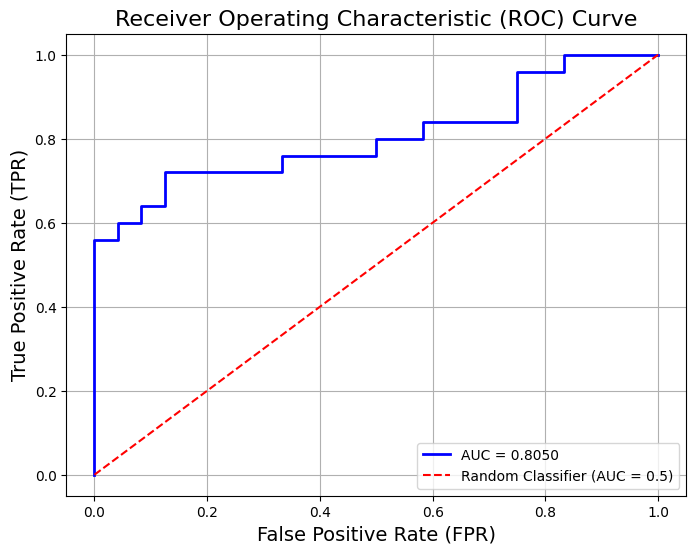

In [ ]:
# Calculate Probabilities for the positive class
y_pred_prob = best_rf.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"\nAUC-ROC Score: {auc_score:.4f}")

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', linewidth=2, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right')
plt.grid()
plt.show()

**SMOTE Technique With LogisticRegression**





In [ ]:
###Logistic Regression
from sklearn.linear_model import LogisticRegression

clf_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(random_state=42))
])

# Train the pipeline on the training data
clf_pipeline.fit(X_train, y_train)

# Evaluate the Model on the test set
y_pred = clf_pipeline.predict(X_test)
accuracy_on_test = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy_on_test:.4f}')

# Perform 5-Fold Cross-Validation with SMOTE before hyperparameter tuning
cv_accuracy_before = cross_val_score(clf_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f"5-Fold CV Accuracy (before tuning): {cv_accuracy_before}")
print(f"Mean CV Accuracy (before tuning): {cv_accuracy_before.mean():.4f}")

Accuracy on the test set: 0.7551
5-Fold CV Accuracy (before tuning): [0.73913043 0.86956522 0.86363636 0.72727273 0.72727273]
Mean CV Accuracy (before tuning): 0.7854


In [ ]:
# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77        24
           1       0.81      0.68      0.74        25

    accuracy                           0.76        49
   macro avg       0.76      0.76      0.75        49
weighted avg       0.76      0.76      0.75        49


Confusion Matrix:
[[20  4]
 [ 8 17]]



AUC-ROC Score: 0.8217


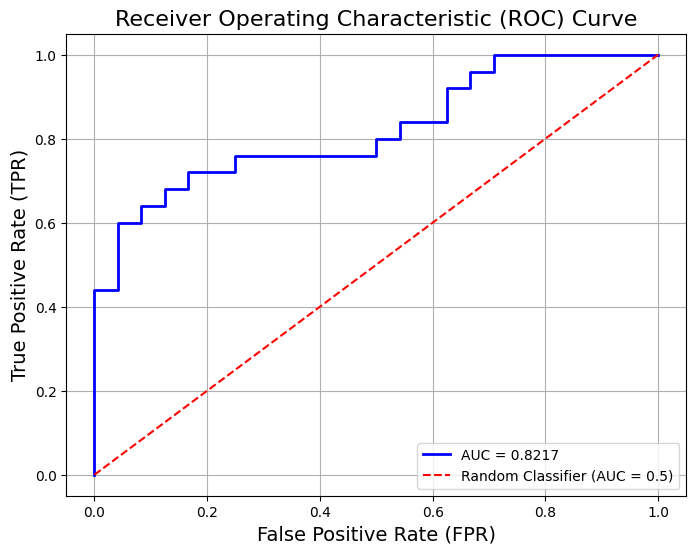

In [ ]:
# Calculate Probabilities for the positive class
y_pred_prob = clf_pipeline.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"\nAUC-ROC Score: {auc_score:.4f}")

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', linewidth=2, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'clf__penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization penalty
    'clf__C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'clf__solver': ['lbfgs', 'liblinear', 'saga'],  # Algorithm to use in the optimization problem
    'clf__max_iter': [100, 200, 300]  # Maximum number of iterations
}
clf_random_search = RandomizedSearchCV(estimator=clf_pipeline, param_distributions=param_dist,cv=5, n_iter=10, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the model on the training data
clf_random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = clf_random_search.best_params_
print(f'Best hyperparameters: {best_params}')

# Get the tuned model
best_clf_pipeline = random_search.best_estimator_

# Evaluate the tuned model on the test set
y_pred = best_clf_pipeline.predict(X_test)
accuracy_after_tuning = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set (after tuning): {accuracy_after_tuning:.4f}')

# Perform 5-Fold Cross-Validation using the best pipeline
cv_accuracy_after = cross_val_score(best_clf_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f"5-Fold CV Accuracy (after tuning): {cv_accuracy_after}")
print(f"Mean CV Accuracy (after tuning): {cv_accuracy_after.mean():.4f}")

Best hyperparameters: {'clf__solver': 'saga', 'clf__penalty': 'l2', 'clf__max_iter': 100, 'clf__C': 10}
Accuracy on the test set (after tuning): 0.7755
5-Fold CV Accuracy (after tuning): [0.7826087  0.73913043 0.95454545 0.77272727 0.77272727]
Mean CV Accuracy (after tuning): 0.8043


In [ ]:
# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        24
           1       0.89      0.64      0.74        25

    accuracy                           0.78        49
   macro avg       0.80      0.78      0.77        49
weighted avg       0.80      0.78      0.77        49


Confusion Matrix:
[[22  2]
 [ 9 16]]



AUC-ROC Score: 0.8050


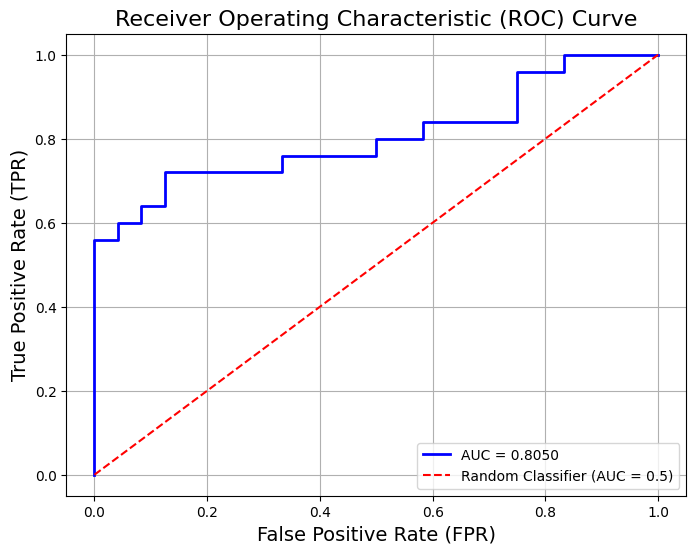

In [ ]:
# Calculate Probabilities for the positive class
y_pred_prob = best_clf_pipeline.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"\nAUC-ROC Score: {auc_score:.4f}")

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', linewidth=2, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right')
plt.grid()
plt.show()